In [3]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import ListedColormap
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
from matplotlib.patches import Circle, Arc, Rectangle, Patch, Polygon, Ellipse
from matplotlib.lines import Line2D
import os
import random

# Building the grid 

In [4]:
def add_image_to_plot(ax, image_path, grid_positions, zoom_level):
    image = plt.imread(image_path)
    for pos in grid_positions:
        offset_image = OffsetImage(image, zoom=zoom_level)
        adjusted_position = (pos[1], pos[0])
        image_box = AnnotationBbox(offset_image, adjusted_position, frameon=False)
        ax.add_artist(image_box)

In [5]:
def draw_agent(ax, position, color):
    body = Circle(position, 0.3, color=color, zorder=5)
    ax.add_patch(body)

    eye_size = 0.05
    eye_offset_x = 0.1
    eye_offset_y = 0.1
    for offset_x in [-eye_offset_x, eye_offset_x]:
        eye = Circle((position[0] + offset_x, position[1] - eye_offset_y), eye_size, color='white', zorder=6)
        pupil = Circle((position[0] + offset_x, position[1] - eye_offset_y), eye_size / 2, color='black', zorder=7)
        ax.add_patch(eye)
        ax.add_patch(pupil)
    
    smile_offset_y = 0.1
    smile = Arc((position[0], position[1] + smile_offset_y), 0.4, 0.2, angle=0, theta1=0, theta2=180, color='black', zorder=6)
    ax.add_patch(smile)

In [6]:
def draw_sink(ax, position):
    sink_outline = Rectangle((position[1] - 0.5, position[0] - 0.5), 1, 1, fill=True, facecolor='gray', edgecolor='black', linewidth=2, zorder=4)
    ax.add_patch(sink_outline)
    
    inner_sink_size = 0.8 
    inner_sink_offset = (1 - inner_sink_size) / 2 
    inner_sink_position = (position[1] - 0.5 + inner_sink_offset, position[0] - 0.5 + inner_sink_offset)
    inner_sink = Rectangle(inner_sink_position, inner_sink_size, inner_sink_size, fill=True, facecolor='darkgray', edgecolor='black', linewidth=1, zorder=5)
    ax.add_patch(inner_sink)
        
    drain_radius = 0.1  
    drain_position = (position[1]+0.15, position[0]) 
    drain = Circle(drain_position, drain_radius, facecolor='lightgray', edgecolor='black', linewidth=2, zorder=5)
    ax.add_patch(drain)


    faucet_head_radius = 0.12
    faucet_spout_width = 0.08
    faucet_spout_height = 0.3
    faucet_x = position[1] - 0.5 
    faucet_y = position[0]

    faucet_spout = Rectangle((faucet_x, faucet_y - faucet_spout_width / 2), faucet_spout_height, faucet_spout_width, color='black', zorder=6)
    ax.add_patch(faucet_spout)

    faucet_head = Circle((faucet_x, faucet_y), faucet_head_radius, color='black', zorder=6)
    ax.add_patch(faucet_head)

In [7]:
def draw_counter(ax, grid_size):
    counter_color = 'tan' 
    hatch_pattern = '+' 

    for i in range(grid_size):
        rect = Rectangle((-0.5, grid_size - 0.5 - i), 1, 1, fill=True, 
                         facecolor=counter_color, 
                         hatch=hatch_pattern, linewidth=1)
        ax.add_patch(rect)
        
        rect = Rectangle((0.5, grid_size - 0.5 - i), 1, 1, fill=True, 
                         facecolor=counter_color,  
                         hatch=hatch_pattern, linewidth=1)
        ax.add_patch(rect)

        rect = Rectangle((-0.5 + i, -0.5), 1, 1, fill=True, 
                         facecolor=counter_color,  
                         hatch=hatch_pattern, linewidth=1)
        ax.add_patch(rect)
        
        outline_width = grid_size - 1 
        outline_height = grid_size + 1 
        outline = Rectangle((1.5, 0.5), outline_width, outline_height, fill=False, 
                            edgecolor='black', linewidth=2)
        ax.add_patch(outline)

In [8]:
def draw_towel(ax, position, towel_size=(0.6,0.3), color='lightblue', line_width=0.03, line_color='black'):
    towel = Rectangle(position, *towel_size, facecolor=color, edgecolor='black', zorder=7)
    ax.add_patch(towel)

    line_height = towel_size[1]  
    x_start = position[0] + towel_size[0]/2 + 0.1 
    y_start = position[1]

    line = Rectangle((x_start, y_start), line_width, line_height, color=line_color, zorder=8)
    ax.add_patch(line)

In [9]:
def draw_plate(ax, position, size, inner):
    plate = Circle(position, size, facecolor='white', linewidth=1, edgecolor='black', zorder=5)
    ax.add_patch(plate)
    plate_inner = Circle(position, size/2, facecolor='white', linewidth=1, edgecolor=inner, zorder=5)
    ax.add_patch(plate_inner) 

In [22]:
def draw_table(ax, table_range, table_pos, line_width=2):
    min_x = table_range[0] + 0.33
    max_x = table_range[1] - 0.33
    min_y = table_range[1] - 3.67
    max_y = table_range[3] - 0.33

    outline = Rectangle((min_x, min_y), max_x - min_x, max_y - min_y, fill=False, 
                        edgecolor='black', linewidth=line_width)
    ax.add_patch(outline)
    
    wood_path = '../stimuli/static/wood1.jpg'
    zoom_level=0.1
    add_image_to_plot(ax, wood_path, table_pos, zoom_level)

In [11]:
def draw_stovetop(ax, position, stovetop_size=(1, 0.5), burner_size=0.2):
    stovetop = Rectangle(position, *stovetop_size, facecolor='gray', edgecolor='black', linewidth=2)
    ax.add_patch(stovetop)

    burner_positions = [(position[0] + stovetop_size[0]/4, position[1] + stovetop_size[1]/2),
                        (position[0] + 3 * stovetop_size[0]/4, position[1] + stovetop_size[1]/2)]

    for burner_pos in burner_positions:
        burner = Circle(burner_pos, burner_size, edgecolor='black', fill=False, linewidth=1)
        ax.add_patch(burner)

        line1 = Line2D([burner_pos[0] - burner_size/2, burner_pos[0] + burner_size/2],
                       [burner_pos[1] - burner_size/2, burner_pos[1] + burner_size/2], color='black')
        line2 = Line2D([burner_pos[0] - burner_size/2, burner_pos[0] + burner_size/2],
                       [burner_pos[1] + burner_size/2, burner_pos[1] - burner_size/2], color='black')
        ax.add_line(line1)
        ax.add_line(line2)

In [12]:
def draw_cutting_board(ax, position, board_size=(0.75, 0.5), color='saddlebrown', edgecolor='black', linewidth=2):
    board = Rectangle(position, *board_size, facecolor=color, edgecolor=edgecolor, linewidth=linewidth, zorder=5)
    ax.add_patch(board)
    
    blade_length = board_size[0] / 2  
    blade_height = board_size[1] / 4
    blade_start_x = position[0] + board_size[0] / 4
    blade_start_y = position[1] + board_size[1] / 2

    blade_points = [(blade_start_x, blade_start_y), 
                    (blade_start_x, blade_start_y - blade_height), 
                    (blade_start_x + blade_length + 0.15, blade_start_y - blade_height + 0.03 / 2)]
    blade = Polygon(blade_points, closed=True, color='gray', zorder=6)
    ax.add_patch(blade)

    handle_width = blade_length / 4
    handle_height = blade_height / 2
    handle = Rectangle((blade_start_x - handle_width, blade_start_y - blade_height / 2), 
                       handle_width, handle_height, color='black', zorder=6)
    ax.add_patch(handle)

In [13]:
def draw_bowl(ax, position):
    bowl = Circle(position, 0.4, facecolor='lightblue', linewidth=1, edgecolor='black', zorder=5)
    ax.add_patch(bowl)
    bowl_inner = Circle(position, 0.3, facecolor='green', linewidth=1, zorder=5)
    ax.add_patch(bowl_inner) 

In [14]:
def draw_carrot(ax, position, carrot_length=0.3, carrot_width=0.1, top_length=0.1):
    carrot_body = Ellipse(position, carrot_length, carrot_width, color='orange', zorder=5)
    ax.add_patch(carrot_body)

    top_positions = [(position[0] - carrot_length / 2, position[1])]
    for top_pos in top_positions:
        carrot_top = Polygon([(top_pos[0], top_pos[1]), 
                              (top_pos[0] - top_length / 2, top_pos[1] + top_length), 
                              (top_pos[0] + top_length / 2, top_pos[1] + top_length)], 
                             closed=True, color='green', zorder=6)
        ax.add_patch(carrot_top)

In [15]:
def generate_dish_plot(agent_positions, plate_positions, sink_positions, towel_positions, imgname):
    # SETTING UP KITCHEN GRID
    fig, ax = plt.subplots(figsize=(5, 5)) 
    grid_size = 7 
    kitchen_grid = np.zeros((grid_size, grid_size))
    cmap = ListedColormap(['white', 'burlywood', 'tan', 'lightblue', 'saddlebrown', 'yellow', 'grey'])
    ax.imshow(kitchen_grid, cmap=cmap, norm=plt.Normalize(vmin=0, vmax=3))

    # DRAWING PARTS OF SCENE
    draw_counter(ax, grid_size)
    table_range = [3,6,4,6]
    table_pos = [(x, y) for x in range(table_range[0], table_range[1]) for y in range(table_range[2], table_range[3])]
    draw_table(ax, table_range, table_pos)
    stove_pos = (3,0)
    draw_stovetop(ax, stove_pos)
    cuttingboard_pos = (5,0)
    draw_cutting_board(ax, cuttingboard_pos)

    # DRAWING AGENTS
    allcolors = ['blue', 'green', 'orange', 'pink', 'purple']
    agent_colors = allcolors[:len(agent_positions)-1]
    agent_colors += ['red']
    for pos, color in zip(agent_positions, agent_colors):
        draw_agent(ax, pos, color=color)

    # DRAWING BOTTLENECKS
    for pos in sink_positions:  
        draw_sink(ax, pos)
        
    for pos in towel_positions:
        towel_pos = (pos[1]-0.3,pos[0]-0.2)
        draw_towel(ax, towel_pos)

    # DRAWING WORKLOAD (PLATES)
    for pos in plate_positions:
        draw_plate(ax, pos, 0.3, 'black')

    ax.axis('off')
    plt.savefig(imgname, dpi=300, bbox_inches='tight')
    plt.show()

In [25]:
def make_dish_images(agent_positions, plate_positions, sink_positions, towel_positions, imgname, idx):
    for numagents,agentlayout in agent_positions.items():
        for numplates,platelayout in plate_positions.items():
            for numsinks,sinklayout in sink_positions.items():
                img = imgname + '_' + str(numagents) + '_' + str(numplates) + '_' + str(idx) + '.png'
                d = os.path.join('../stimuli/' + imgname, imgname + '_' + str(numagents) + '_' + str(numplates))
        
                if not os.path.isdir(d): os.mkdir(d)
                    
                generate_dish_plot(agentlayout, platelayout, sinklayout, towel_positions[numsinks], os.path.join(d, img)) 

In [26]:
def generate_salad_plot(agent_positions, carrot_positions, cuttingboard_positions, imgname):
    # Set up kitchen grid    
    fig, ax = plt.subplots(figsize=(5, 5)) 
    grid_size = 7 
    kitchen_grid = np.zeros((grid_size, grid_size))
    cmap = ListedColormap(['white', 'burlywood', 'tan', 'lightblue', 'saddlebrown', 'yellow', 'grey'])
    ax.imshow(kitchen_grid, cmap=cmap, norm=plt.Normalize(vmin=0, vmax=3))

    # Draw agents
    allcolors = ['blue', 'green', 'orange', 'pink', 'purple']
    agent_colors = allcolors[:len(agent_positions)-1]
    agent_colors += ['red']
    for pos, color in zip(agent_positions, agent_colors):
        draw_agent(ax, pos, color=color)

    # Draw misc. parts of scene
    draw_counter(ax, grid_size)
    table_range = [3,6,4,6]
    table_pos = [(x, y) for x in range(table_range[0], table_range[1]) for y in range(table_range[2], table_range[3])]
    draw_table(ax, table_range, table_pos)
    bowl_pos = (5.5,0.1)
    draw_bowl(ax, bowl_pos)

    # Draw bottlenecks (in this case, sinks and cutting boards)
    sink_pos = (3,1)
    draw_sink(ax, sink_pos)

    drying_pos = (4,1)
    towel_pos = (drying_pos[1]-0.3,drying_pos[0]-0.2)
    draw_towel(ax, towel_pos)

    for pos in cuttingboard_positions:  
        draw_cutting_board(ax, pos)

    # Draw workload (in this case, carrots)
    draw_plate(ax, (1,2), 0.5, 'white')
    for pos in carrot_positions:
        draw_carrot(ax, pos)

    # Show the plot
    ax.axis('off')
    plt.savefig(imgname, dpi=300, bbox_inches='tight')
    plt.show()

In [27]:
def make_salad_images(agent_positions, carrot_positions, cuttingboard_positions, imgname, idx):
    for numagents,agentlayout in agent_positions.items():
        for numcarrots,carrotlayout in carrot_positions.items():
            for numboards, boardlayout in cuttingboard_positions.items():
                img = imgname + '_' + str(numagents) + '_' + str(numcarrots) + '_' + str(idx) + '.png'
                d = os.path.join('../stimuli/' + imgname, imgname + '_' + str(numagents) + '_' + str(numcarrots))
                
                if not os.path.isdir(d): os.mkdir(d)
                
                generate_salad_plot(agentlayout, carrotlayout, boardlayout, os.path.join(d, img)) 

# Generating stimuli

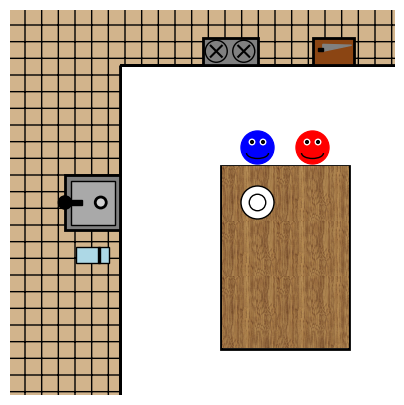

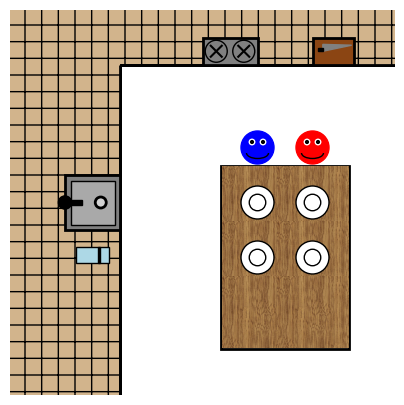

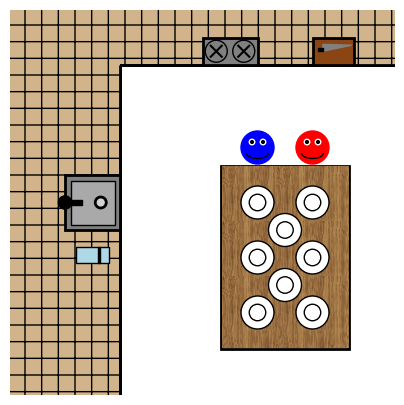

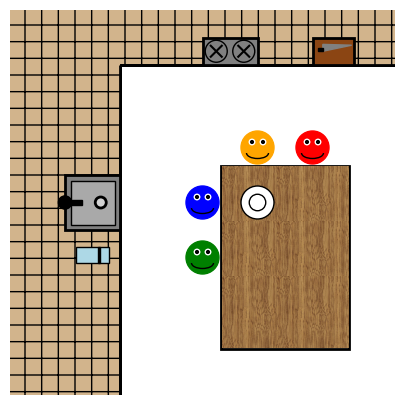

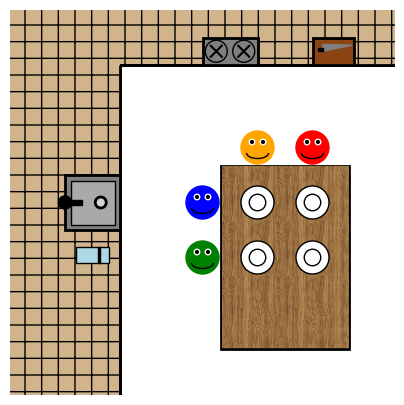

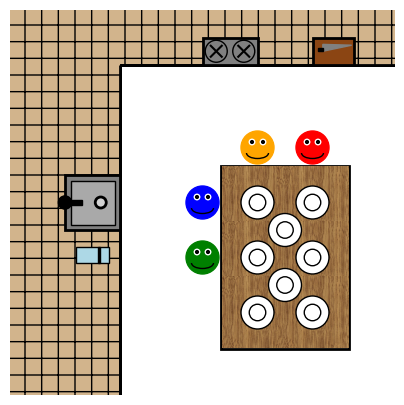

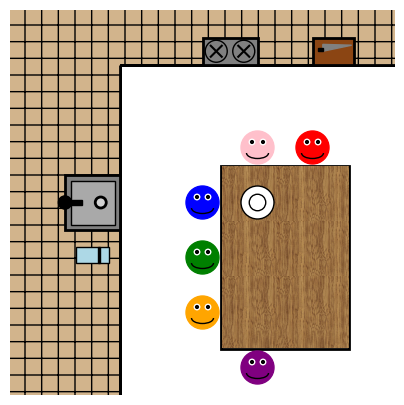

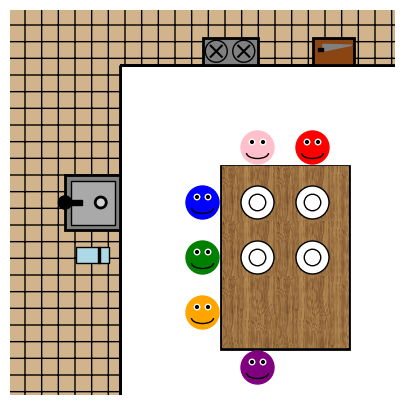

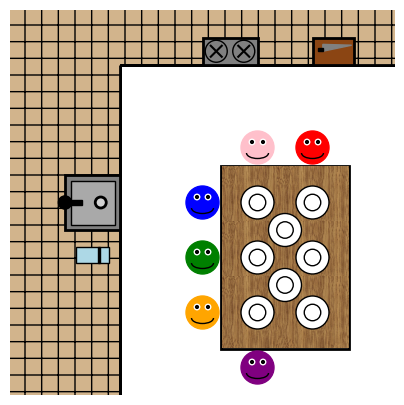

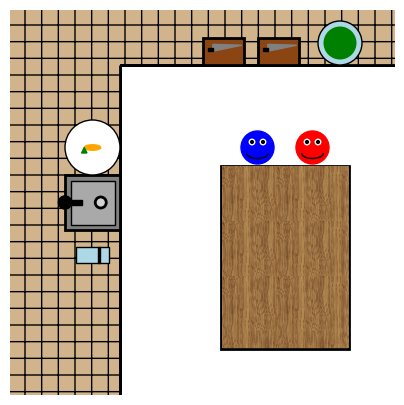

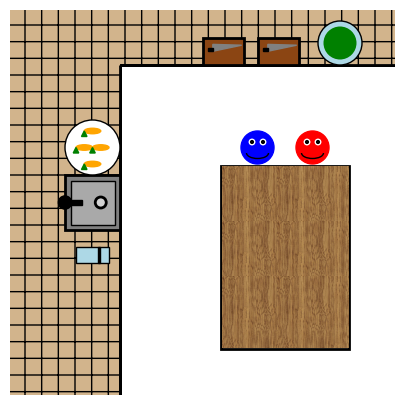

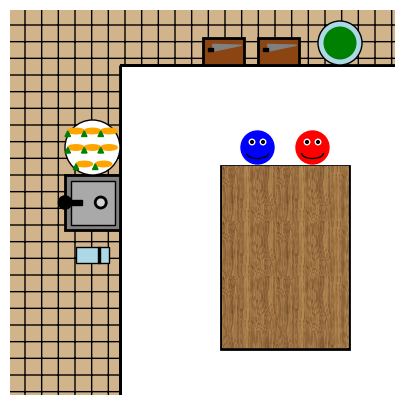

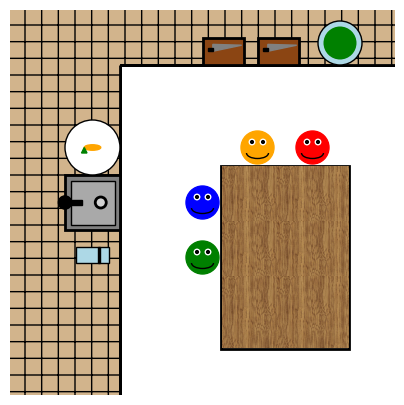

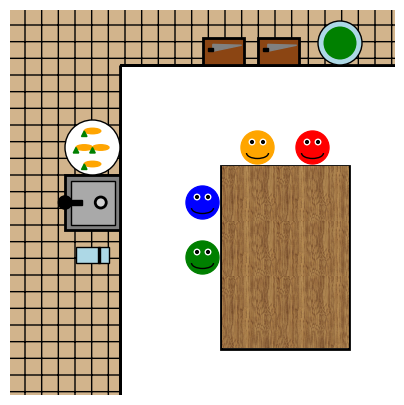

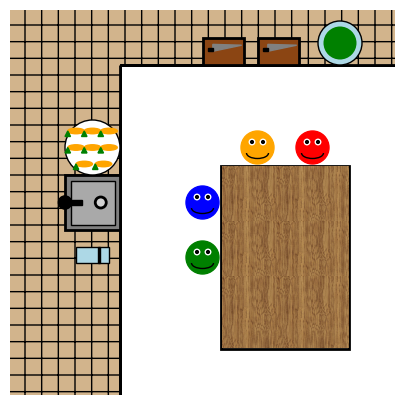

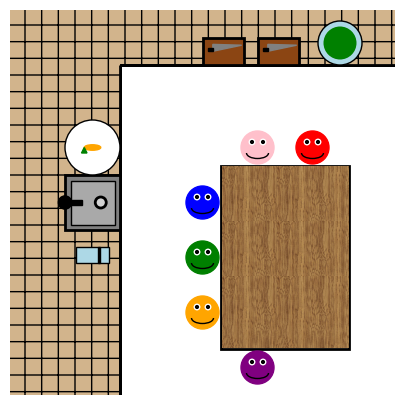

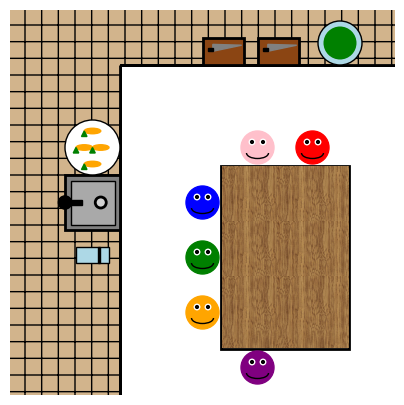

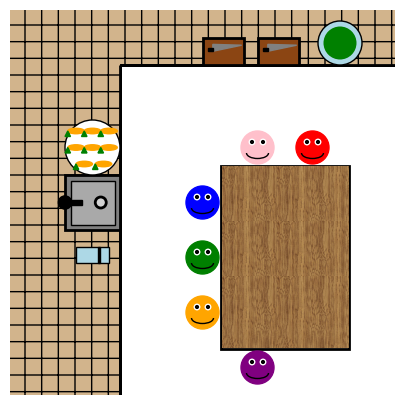

In [29]:
agent_positions = {2: [(4,2), (5,2)], 4: [(3,3), (3,4), (4,2), (5,2)], 6: [(3, 3), (3,4), (3,5), (4,2), (4,6), (5,2)]}
plate_positions = {1: [(4,3)], 4: [(4,3), (5,3), (4,4), (5,4)], 8: [(4,3), (5,3), (4,4), (5,4), (4,5), (5,5), (4.5, 3.5), (4.5, 4.5)]}
sink_positions = {1: [(3,1)]}
towel_positions = {1: [(4,1)]}
make_dish_images(agent_positions, plate_positions, sink_positions, towel_positions, "dishes", 1) 

agent_positions = {2: [(4,2), (5,2)], 4: [(3,3), (3,4), (4,2), (5,2)], 6: [(3, 3), (3,4), (3,5), (4,2), (4,6), (5,2)]}
carrot_positions = {1: [(1,2)], 4: [(1,2.3), (0.85,2), (1.15,2), (1,1.7)], 8: [(0.7,2), (1,2), (1.3,2), (0.7,1.7), (1,1.7), (1.3,1.7), (0.85,2.3), (1.2,2.3)]}
cuttingboard_positions = {2: [(3,0), (4,0)]}
make_salad_images(agent_positions, carrot_positions, cuttingboard_positions, "salad", 1) 